# Signal modeling

- Shifting
- Spikes
- Anti shift
- Anti spikes

Signals:

- Harmonic
- Random
- Linear function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [2]:
from lib.signalprocessingmd import harm,shift,spike,fourierTransform,getScaledDomain,cutSignal
from lib.helpersmd import getRandomND,getMyRandom
from lib.plotmd import plotVector,plot2D

## Fourier transform for shifted signal
* Create a harmonic signal 

$f(x)=Asin(2\pi f_0t)$

* Shift this signal by C

$A=100 ;f_0=53 ; C=1000$

<IPython.core.display.Javascript object>


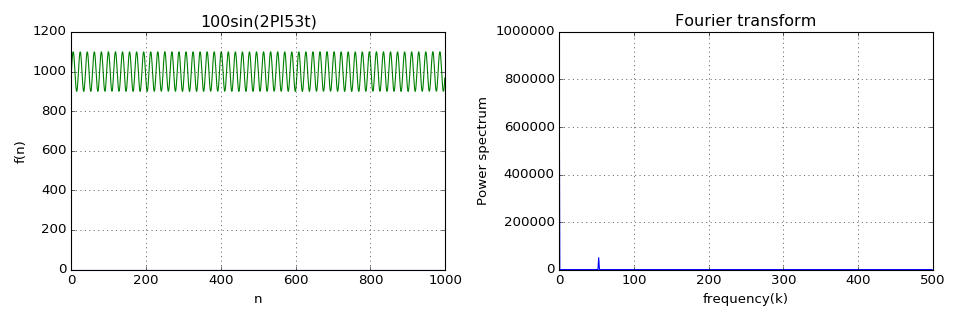

In [3]:
N=1000
dt=0.001
# 100sin(2PI53t)
A=100
c=1000
f=53

xk,desc1=harm(A,f,dt,N)
xk=shift(xk,c)
_,Cn=fourierTransform(xk)
Cn=Cn[:N/2]
f=getScaledDomain(dt,N)[:N/2]

plt.figure(1,figsize=(12, 4), dpi=80)
plt.subplot(121)
plt.plot([0,1000],[0,0])
plotVector(xk,desc1,"n","f(n)")
plt.subplot(122)
plot2D(f,Cn,"Fourier transform","frequency(k)","Power spectrum")
plt.tight_layout()
plt.show()

## Implement AntiShift for a signal

<IPython.core.display.Javascript object>


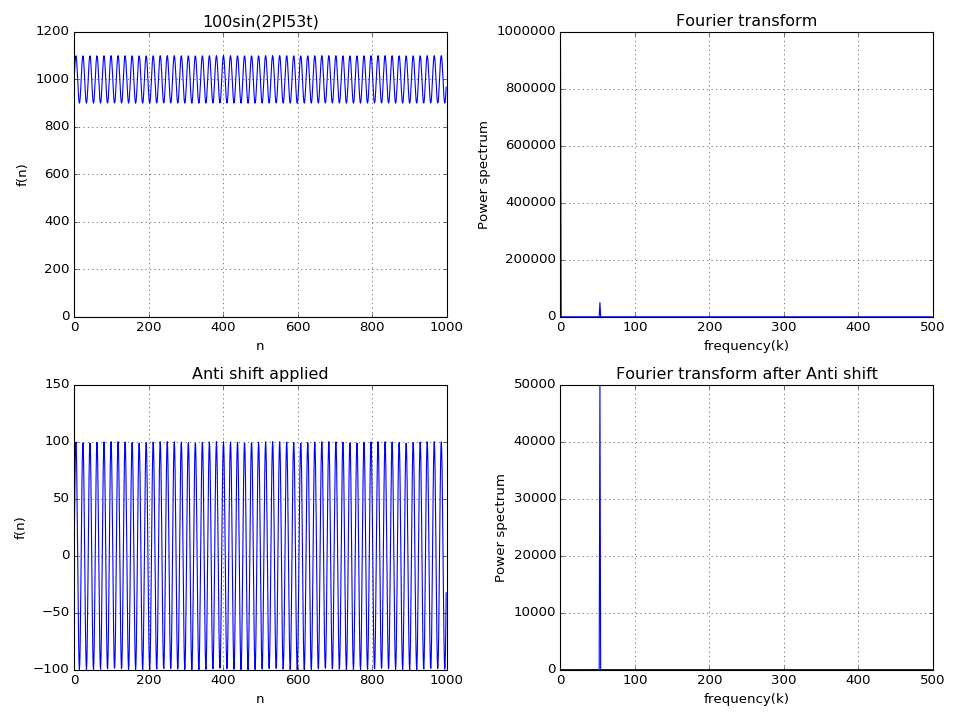

In [4]:
def antiShift(X):
    return X-X.mean()

xk2=antiShift(xk)
_,Cn2=fourierTransform(xk2)
Cn2=Cn2[:N/2]

plt.figure(2,figsize=(12, 9), dpi=80)
plt.subplot(221)
plotVector(xk,desc1,"n","f(n)")
plt.plot([0,1000],[0,0])
plt.subplot(222)
plot2D(f,Cn,"Fourier transform","frequency(k)","Power spectrum")
plt.subplot(223)
plotVector(xk2,"Anti shift applied","n","f(n)")
plt.subplot(224)
plot2D(f,Cn2,"Fourier transform after Anti shift","frequency(k)","Power spectrum")
plt.tight_layout()
plt.show()


## Process signal of linear function 

$f(x)=ax+b$

a=0.5;b=100

compute Fourier transform

<IPython.core.display.Javascript object>


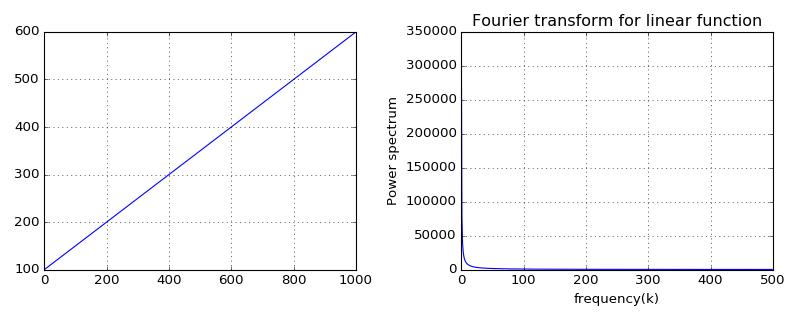

In [5]:
a=0.5
b=100
dt=0.001

xk=np.arange(N)
yk=a*xk+b

plt.figure(3,figsize=(10, 4))
plt.subplot(121)
plt.plot(yk)
plt.grid()
_,Cn3=fourierTransform(yk)
Cn3=Cn3[:N/2]
plt.subplot(122)
plot2D(f,Cn3,"Fourier transform for linear function","frequency(k)","Power spectrum")
plt.tight_layout()

plt.show()

## Random Signal and Fourier transform

<IPython.core.display.Javascript object>


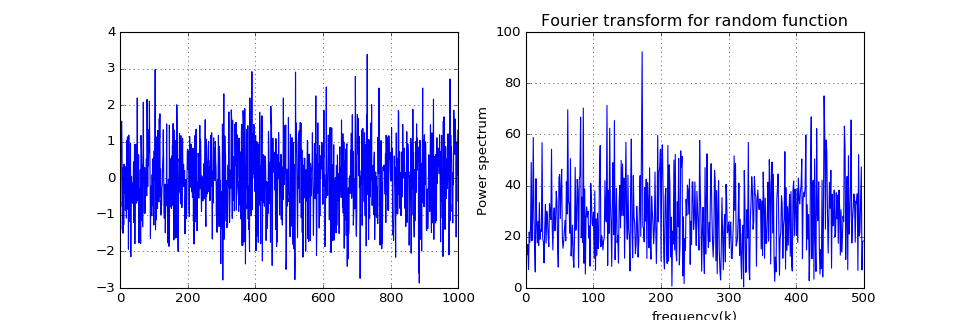

In [6]:
xk=getRandomND(N)
_,Cn4=fourierTransform(xk)
Cn4=Cn4[:N/2]

plt.figure(4,figsize=(12, 4), dpi=80)
plt.subplot(121)
plt.plot(xk)
plt.grid()
plt.subplot(122)
plot2D(f,Cn4,"Fourier transform for random function","frequency(k)","Power spectrum")
plt.show()

## Spikes and Fourier transform

<IPython.core.display.Javascript object>


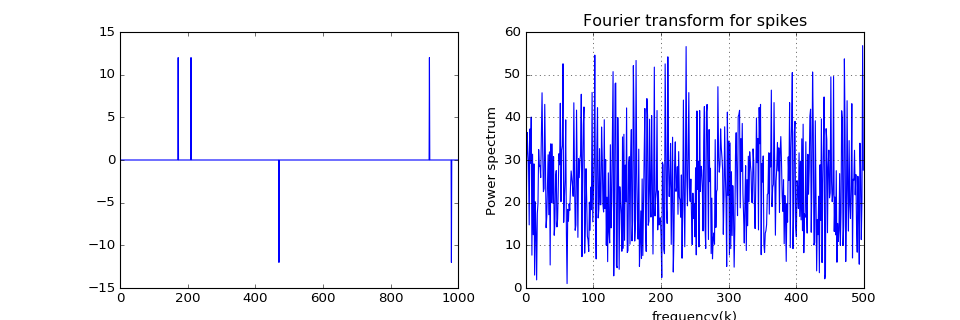

In [7]:
xk=np.zeros((N,1))
xk=spike(xk,5)
_,Cn5=fourierTransform(xk)
Cn5=Cn5[:N/2]

plt.figure(5,figsize=(12, 4))
plt.subplot(121)
plt.grid()
plotVector(xk,"","","")
plt.subplot(122)
plot2D(f,Cn5,"Fourier transform for spikes","frequency(k)","Power spectrum")
plt.show()

## Implement anti Spikes

<IPython.core.display.Javascript object>


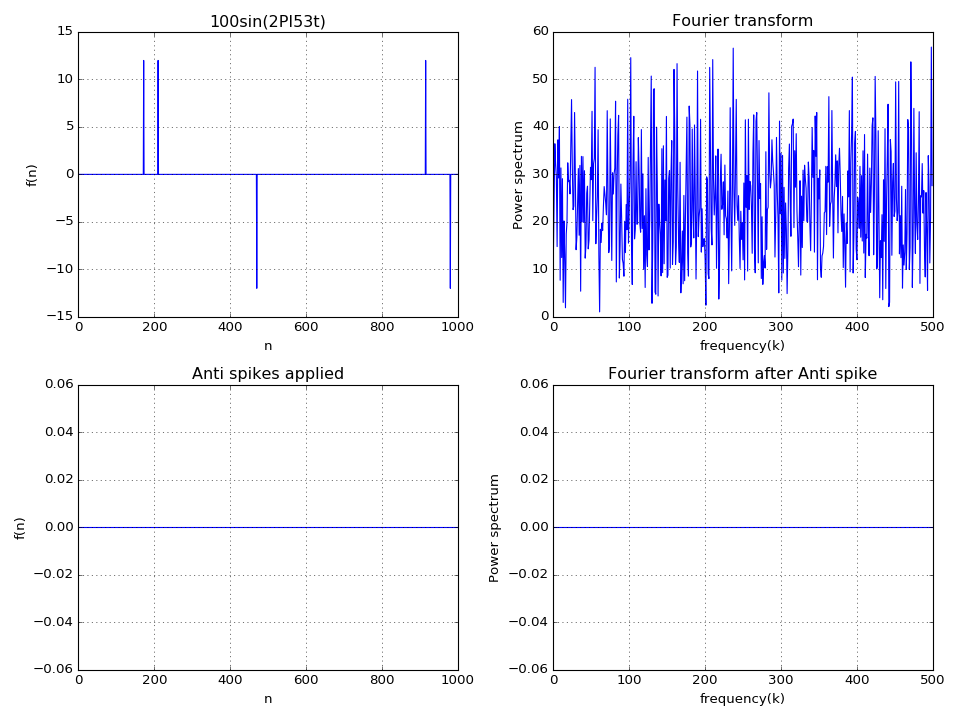

In [8]:
def removeSpikes(sig):
    _X=np.copy(sig)
    mean=_X.mean()
    std=_X.std()
    _X=(_X-mean)/std
    for i in range(1,_X.shape[0]-1):
        if abs(_X[i])>2:
            _X[i]=(_X[i-1]+_X[i+1])/2
    _X=(_X*std)+mean
    return _X

filtered=removeSpikes(xk)
_,Cn6=fourierTransform(filtered)
Cn6=Cn6[:N/2]

plt.figure(6,figsize=(12, 9), dpi=80)
plt.subplot(221)
plotVector(xk,desc1,"n","f(n)")
plt.subplot(222)
plot2D(f,Cn5,"Fourier transform","frequency(k)","Power spectrum")
plt.subplot(223)
plotVector(filtered,"Anti spikes applied","n","f(n)")
plt.subplot(224)
plot2D(f,Cn6,"Fourier transform after Anti spike","frequency(k)","Power spectrum")
plt.tight_layout()
plt.show()


## ِApply anti spikes on harmonic signal

<IPython.core.display.Javascript object>


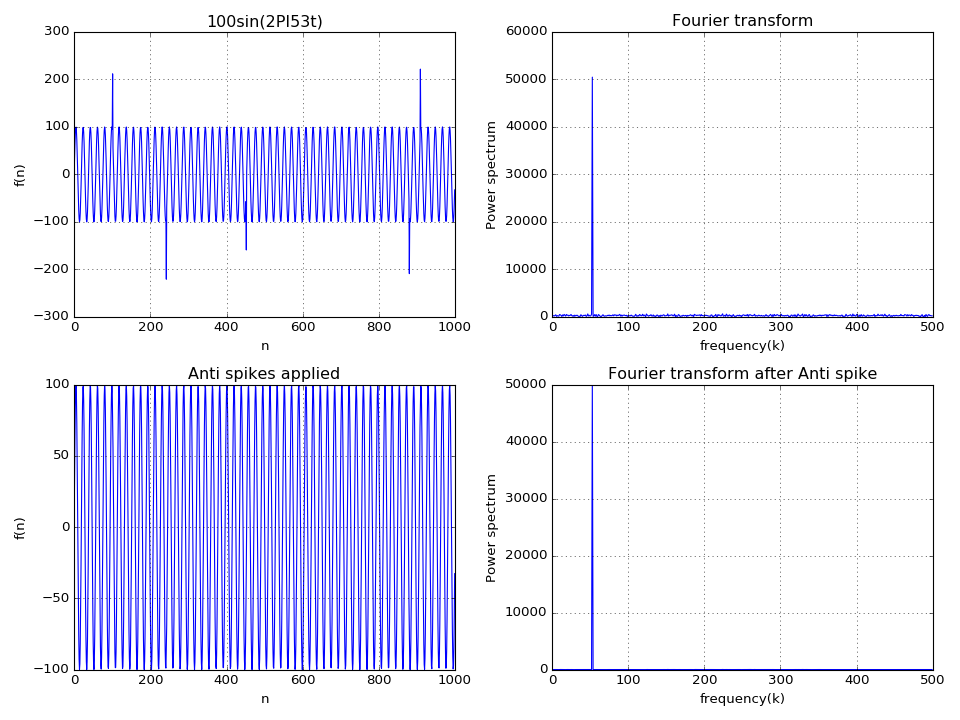

In [9]:
# 100sin(2PI53t)
A=100
c=1000
f=53

xk,desc1=harm(A,f,dt,N)
xk=spike(xk,5)
_,Cn7=fourierTransform(xk)
Cn7=Cn7[:N/2]
f=getScaledDomain(dt,N)[:N/2]

filtered=removeSpikes(xk)
_,Cn8=fourierTransform(filtered)
Cn8=Cn8[:N/2]

plt.figure(7,figsize=(12, 9), dpi=80)
plt.subplot(221)
plotVector(xk,desc1,"n","f(n)")
plt.subplot(222)
plot2D(f,Cn7,"Fourier transform","frequency(k)","Power spectrum")
plt.subplot(223)
plotVector(filtered,"Anti spikes applied","n","f(n)")
plt.subplot(224)
plot2D(f,Cn8,"Fourier transform after Anti spike","frequency(k)","Power spectrum")
plt.tight_layout()
plt.show()